# Import libraries and load data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("pmsm_temperature_data.csv")

In [3]:
df.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [4]:
df.shape

(998070, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
df.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

In [7]:
df.isna().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [8]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [9]:
df['profile_id'].unique()

array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       72])

In [10]:
len(df['profile_id'].unique())


52

In [11]:
df['profile_id'].value_counts()

20    43970
6     40387
65    40093
66    36475
27    35360
4     33423
58    33381
56    33122
53    32441
79    31153
44    26340
70    25676
62    25599
30    23862
80    23823
74    23760
68    23330
36    22608
76    22187
48    21982
29    21357
32    20959
81    17671
45    17141
42    16919
73    16785
41    16699
63    16667
31    15586
69    15349
72    15300
10    15255
71    14655
77    14621
60    14542
61    14515
57    14402
75    13471
67    11134
49    10815
50    10809
55    10806
54    10806
78     8444
43     8442
11     7886
59     7474
51     6260
64     6249
52     3725
46     2179
47     2175
Name: profile_id, dtype: int64

Each session recorded points from 18 min (profile 47 : 2175 samples/(2*60)=18.125 to just over 6 hours (profile 20: 43970 samples/( 2*60)= 366.417 min => 6.107 hours ///// sample frequency  2 HZ


## Recorded sessions lenths

In [12]:
grouped_df_id = df.groupby(['profile_id'])

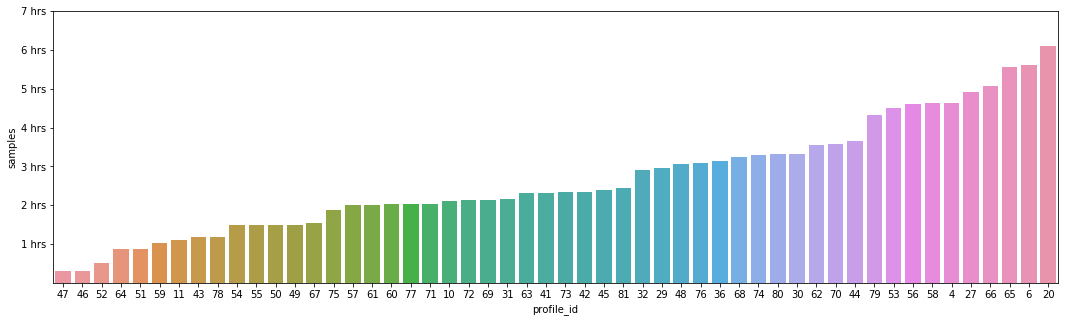

In [13]:
fig = plt.figure(figsize=(18, 5))
df_hours= grouped_df_id.size().sort_values().rename('samples').reset_index()
ordered_ids = df_hours.profile_id.values.tolist()
sns.barplot(y='samples', x='profile_id', data=df_hours, order = ordered_ids )
tcks = plt.yticks(2*3600*np.arange(1, 8), [f'{a} hrs' for a in range(1, 8)]) # 2Hz sample rate

## Linear Correlations

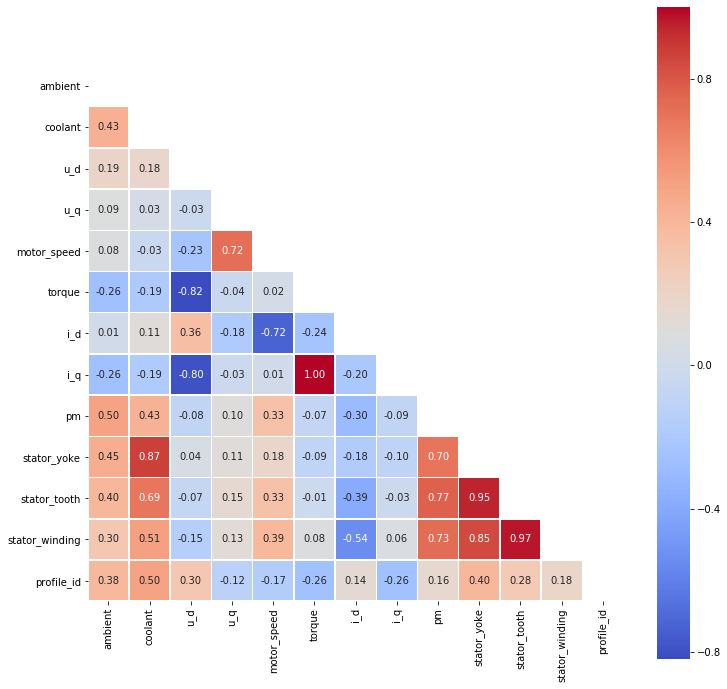

In [14]:
#correlation map
f,ax=plt.subplots(figsize=(12,12))
corr=df.corr()
mask= np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', 
            mask= mask, 
            cmap= 'coolwarm',
            square=True,ax=ax)

plt.show()

All 4 temperatures inside the motor are highly correlated as expected. High correlation of i_q and torque.

In [15]:
df_new = df.drop(['stator_yoke', 'stator_tooth', 'stator_winding','profile_id'], axis=1)

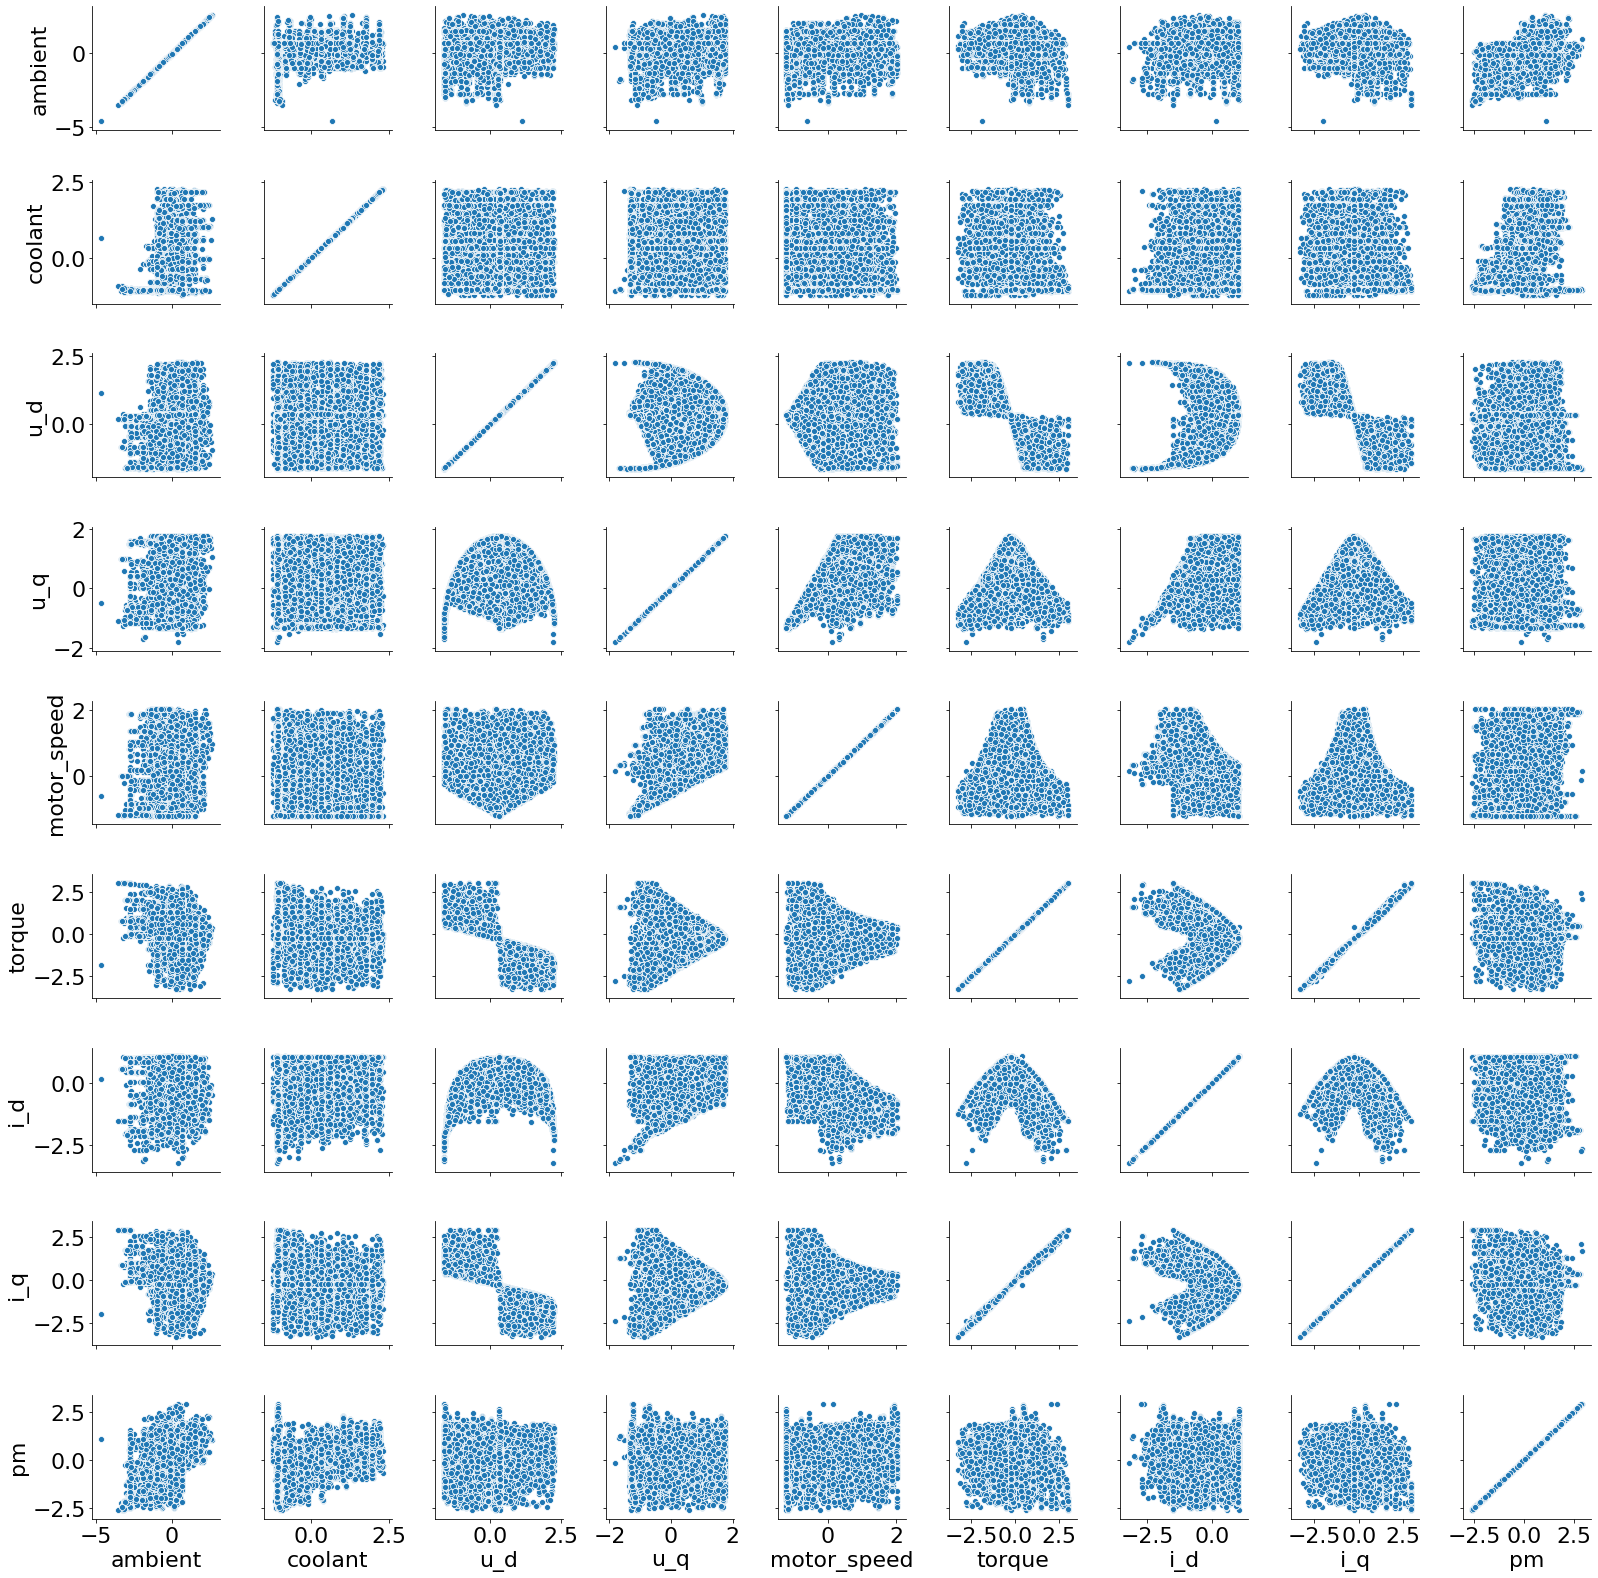

In [17]:
matplotlib.rcParams.update({'font.size': 22})
g = sns.PairGrid(df_new.sample(frac = 0.01))

g.map(sns.scatterplot)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


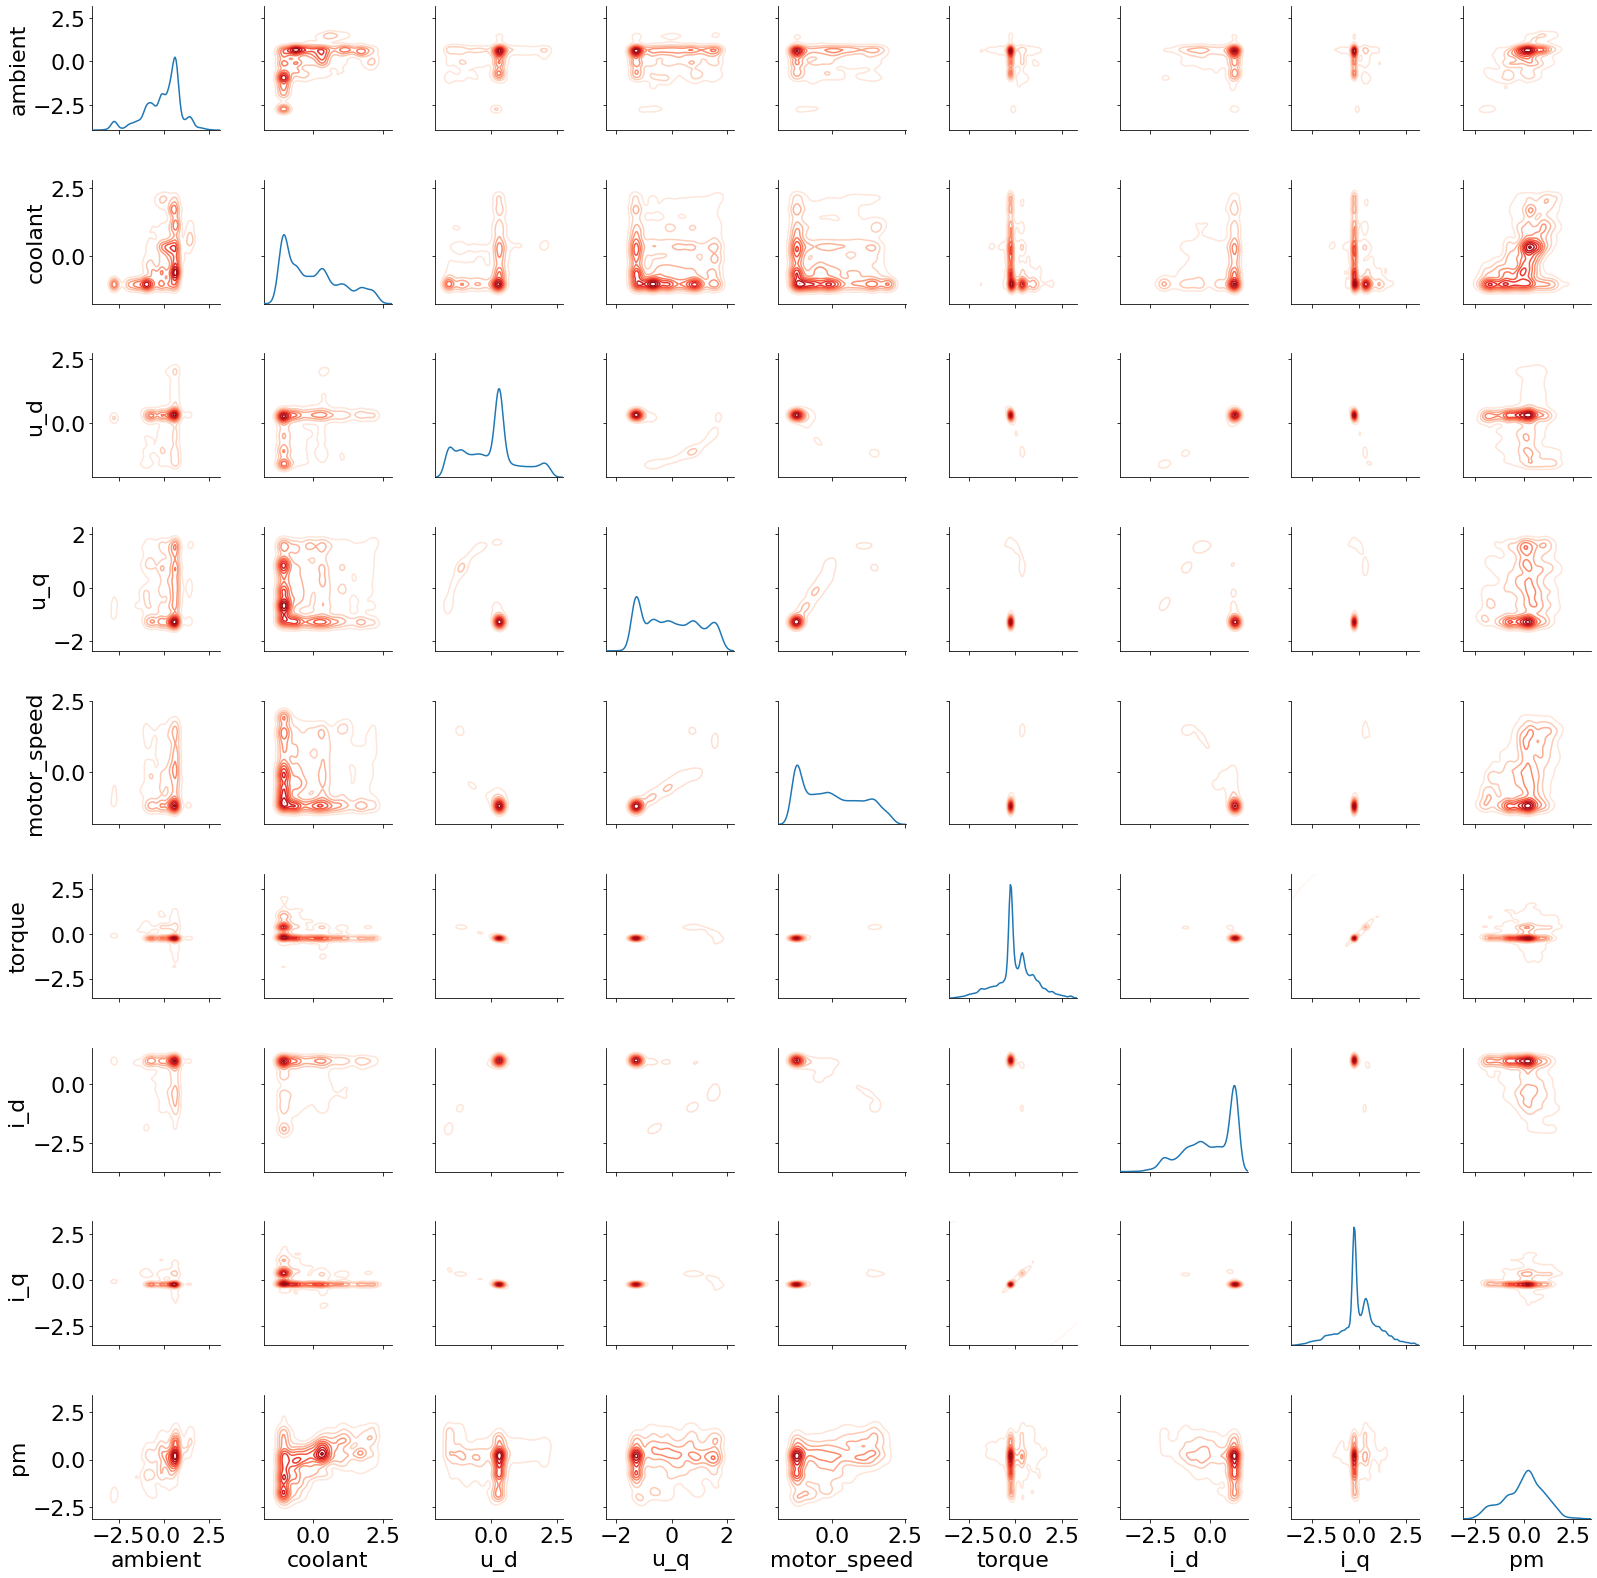

In [20]:
%time
g = sns.PairGrid(df_new.sample(frac = 0.01))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,n_level = 5, cmap="Reds")